<a href="https://colab.research.google.com/github/albertovpd/ml_with_bigquery_personal_notes/blob/master/london_bikes_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Before you begin


1.   Use the [Cloud Resource Manager](https://console.cloud.google.com/cloud-resource-manager) to Create a Cloud Platform project if you do not already have one.
2.   [Enable billing](https://support.google.com/cloud/answer/6293499#enable-billing) for the project.
3.   [Enable BigQuery](https://console.cloud.google.com/flows/enableapi?apiid=bigquery) APIs for the project.


In [ ]:
# This is just a jupyter to show how to work with Python through BigQuery. There is no research here at the moment (work pending to anonymize)

### Provide your credentials to the runtime

In [11]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


## Optional: Enable data table display

Colab includes the ``google.colab.data_table`` package that can be used to display large pandas dataframes as an interactive data table.
It can be enabled with:

In [12]:
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


If you would prefer to return to the classic Pandas dataframe display, you can disable this by running:
```python
%unload_ext google.colab.data_table
```

# Use BigQuery via magics

The `google.cloud.bigquery` library also includes a magic command which runs a query and either displays the result or saves it to a variable as a `DataFrame`.

#V2 TONE INFO

ALL IS TYPE(FLOAT)

- tone  = average tone [-100,+100]. common values between -10 and 10

- pos_score = % of all words in the article found to have a positive emotional connotation [0,+100]

- neg_score = the same but negative

- polarity = % of words that had matches in the tonal dictionary as an indicator of how emotionally polarized or charged the text is. If Polarity is high
  but Tone neutral, this suggests the text was highly emotionally charged, but had roughly equivalent numbers of positively and negatively charged 
  emotional words

- arf = activity reference density. % of words that that were active words. How active is the text compared with a clinically descriptive text.

- sg_rf = self/group reference density. % of all words in the article that are pronouns, capturing a combination of self-references and group-based discurse.
  EGO stuff. In news media it tends to have a very low ARF 

- wc  = total number of words in the document

## as shown below, if after project if "df" is written, it turns the query into a pandas dataframe

In [0]:
# %%bigquery --project yourprojectid

%%bigquery --project isentropic-road-260315 df

SELECT
  bikes_count,
  EXTRACT(dayofweek
  FROM
    start_date) AS dayofweek,
  EXTRACT(hour
  FROM
    start_date) AS hourofday,
  AVG(duration) AS duration,
  start_station_name
FROM
  `bigquery-public-data.london_bicycles.cycle_hire` a
JOIN
  `bigquery-public-data.london_bicycles.cycle_stations` b
ON
  a.start_station_name = b.name
GROUP BY
  bikes_count,
  start_date,
  start_station_name

# Save output in a variable `df`

%%bigquery --project yourprojectid df 
SELECT 
  COUNT(*) as total_rows
FROM `bigquery-public-data.samples.gsod`

In [14]:
df

,bikes_count,dayofweek,hourofday,duration,start_station_name
0,49,3,18,840.0,"Jubilee Plaza, Canary Wharf"
1,34,4,7,480.0,"Crosswall, Tower"
2,49,4,0,600.0,"Jubilee Plaza, Canary Wharf"
3,43,6,4,960.0,"Hampstead Road, Euston"
4,49,6,17,600.0,"Jubilee Plaza, Canary Wharf"
...,...,...,...,...,...
20295569,48,5,14,1140.0,"Museum of London, Barbican"
20295570,48,3,14,300.0,"Museum of London, Barbican"
20295571,48,7,12,900.0,"Soho Square , Soho"
20295572,48,3,16,2580.0,"Museum of London, Barbican"


In [0]:
%matplotlib inline
# https://github.com/albertovpd/datamad1019/blob/lab-supervised-learning/module-3/lab-supervised-learning/your-code/main.ipynb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


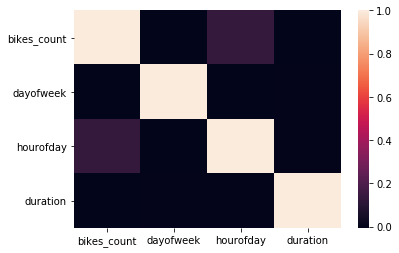

In [16]:
corre = df.corr()
sns.heatmap(corre)

# Use BigQuery through google-cloud-bigquery

See [BigQuery documentation](https://cloud.google.com/bigquery/docs) and [library reference documentation](https://googlecloudplatform.github.io/google-cloud-python/latest/bigquery/usage.html).

The [GSOD sample table](https://bigquery.cloud.google.com/table/bigquery-public-data:samples.gsod) contains weather information collected by NOAA, such as precipitation amounts and wind speeds from late 1929 to early 2010.


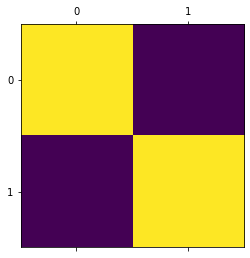

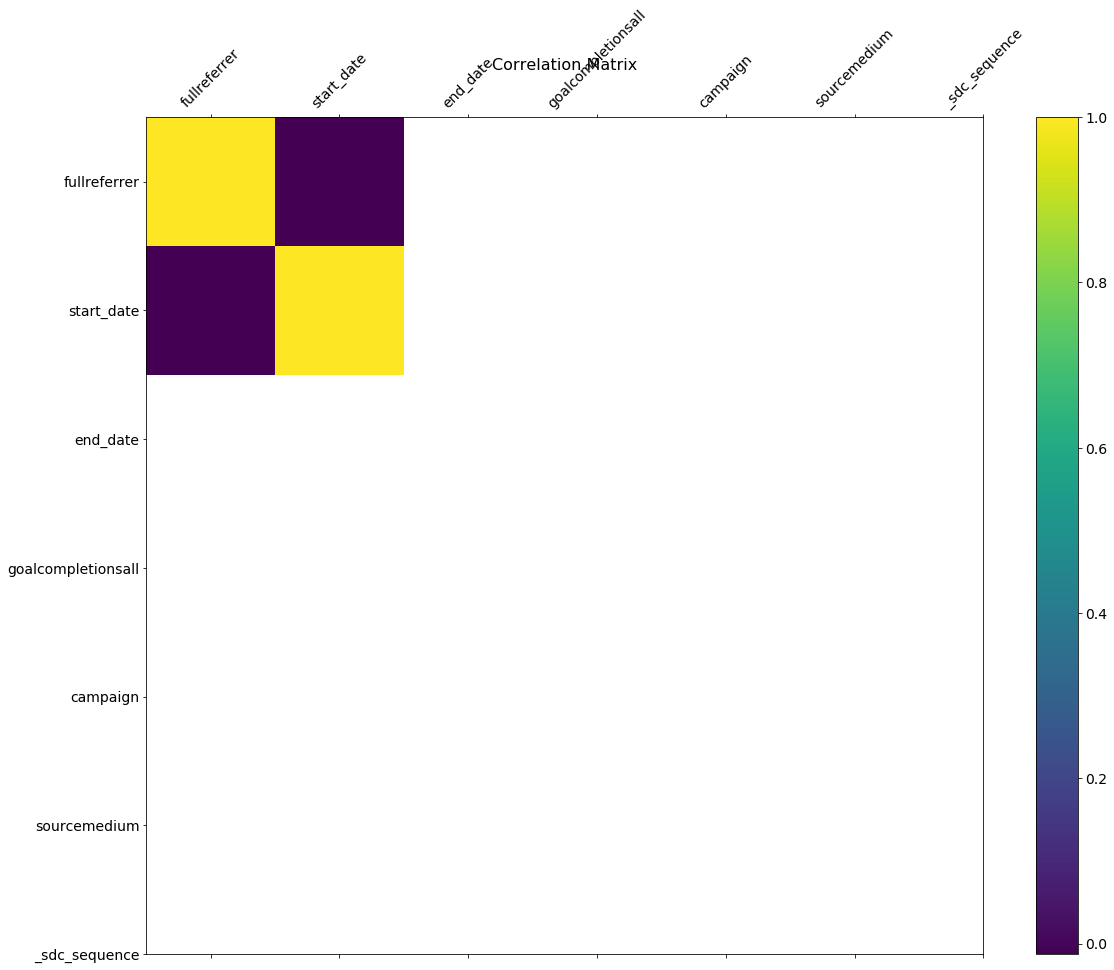

In [0]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# esto de aquí significa que estamos jodidos. 
Python solo encuentra correlaciones entre 2 de las columnas de todo el dataset

------------------------------------------

### Declare the Cloud project ID which will be used throughout this notebook

In [0]:
project_id = '[your project ID]'

### Sample approximately 2000 random rows

In [0]:
from google.cloud import bigquery

client = bigquery.Client(project=project_id)

sample_count = 2000
row_count = client.query('''
  SELECT 
    COUNT(*) as total
  FROM `bigquery-public-data.samples.gsod`''').to_dataframe().total[0]

df = client.query('''
  SELECT
    *
  FROM
    `bigquery-public-data.samples.gsod`
  WHERE RAND() < %d/%d
''' % (sample_count, row_count)).to_dataframe()

print('Full dataset has %d rows' % row_count)

Full dataset has 114420316 rows


### Describe the sampled data

In [0]:
df.describe()

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,num_mean_station_pressure_samples,mean_visibility,num_mean_visibility_samples,mean_wind_speed,num_mean_wind_speed_samples,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,total_precipitation,snow_depth
count,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1883.000000,1883.000000,1460.000000,1460.000000,741.000000,741.000000,1776.000000,1776.000000,1950.000000,1950.000000,1922.000000,241.000000,1977.000000,1793.000000,91.000000
mean,505585.599293,89647.441132,1987.181405,6.525518,15.715513,52.391865,13.018696,42.018694,12.982475,1015.278630,11.506164,967.396491,11.979757,11.529279,12.737050,6.903385,12.969744,12.297659,24.829461,44.059231,0.065694,8.929670
std,302491.187318,27088.238467,15.993488,3.419259,8.661563,23.329842,7.886977,21.691902,7.914005,9.325395,7.516349,71.774000,7.783445,8.320365,7.843476,5.039771,7.860417,6.778960,8.776778,23.344521,0.283467,9.922707
min,10100.000000,13.000000,1933.000000,1.000000,1.000000,-91.400002,4.000000,-63.799999,4.000000,956.299988,4.000000,604.500000,4.000000,0.000000,4.000000,0.000000,4.000000,1.000000,8.000000,-96.900002,0.000000,0.400000
25%,238255.000000,99999.000000,1978.000000,4.000000,8.000000,39.299999,7.000000,30.349999,7.000000,1009.700012,6.000000,952.900024,6.000000,6.300000,7.000000,3.400000,7.000000,7.800000,19.400000,32.000000,0.000000,2.000000
50%,538980.000000,99999.000000,1990.000000,7.000000,16.000000,55.000000,8.000000,44.000000,8.000000,1014.850006,8.000000,995.599976,8.000000,9.300000,8.000000,5.800000,8.000000,11.100000,23.900000,46.400002,0.000000,5.900000
75%,725273.500000,99999.000000,2000.000000,10.000000,23.000000,69.800003,23.000000,56.700001,23.000000,1020.799988,21.000000,1010.299988,22.000000,13.825000,23.000000,9.100000,23.000000,15.900000,28.900000,60.799999,0.010000,11.600000
max,999999.000000,99999.000000,2010.000000,12.000000,31.000000,105.099998,24.000000,80.500000,24.000000,1052.900024,24.000000,1037.099976,24.000000,99.400002,24.000000,57.299999,24.000000,68.000000,66.000000,98.599998,5.910000,51.200001


### View the first 10 rows

In [0]:
df.head(10)

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,num_mean_station_pressure_samples,mean_visibility,num_mean_visibility_samples,mean_wind_speed,num_mean_wind_speed_samples,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,max_temperature_explicit,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,105780,99999,1968,9,13,46.000000,8,44.200001,8.0,NaN,NaN,NaN,NaN,4.700000,8.0,15.3,8.0,21.0,NaN,43.000000,False,None,None,0.02,NaN,True,True,True,True,True,True
1,25710,99999,1989,5,2,51.299999,23,44.900002,23.0,NaN,NaN,NaN,NaN,6.600000,23.0,7.5,23.0,12.0,NaN,42.799999,True,None,None,0.00,NaN,False,False,False,False,False,False
2,475160,99999,2003,4,26,45.200001,16,44.500000,16.0,NaN,NaN,NaN,NaN,4.500000,16.0,7.4,16.0,13.0,NaN,39.200001,True,None,None,NaN,NaN,False,False,False,False,False,False
3,476720,99999,1989,12,8,51.599998,4,34.000000,4.0,1005.400024,4.0,NaN,NaN,9.000000,4.0,5.0,4.0,8.0,NaN,41.900002,True,None,None,0.00,NaN,False,False,False,False,False,False
4,940040,99999,1991,6,9,84.300003,4,75.199997,4.0,1009.900024,4.0,1009.099976,4.0,24.900000,4.0,6.0,4.0,9.9,NaN,79.199997,True,None,None,0.00,NaN,False,False,False,False,False,False
5,103250,99999,1976,7,23,63.599998,13,48.599998,13.0,1022.099976,5.0,NaN,NaN,24.600000,13.0,3.0,12.0,6.0,NaN,48.200001,False,None,None,0.00,NaN,False,False,False,False,False,False
6,919280,99999,1981,2,21,83.800003,5,75.900002,5.0,1007.900024,5.0,NaN,NaN,17.100000,4.0,8.5,5.0,8.9,NaN,77.000000,False,None,None,0.00,NaN,False,False,False,False,False,False
7,961710,99999,2004,6,23,81.900002,6,74.900002,6.0,1010.500000,6.0,1008.000000,6.0,4.800000,6.0,1.5,6.0,5.1,NaN,74.800003,False,None,None,0.00,NaN,False,False,False,False,False,False
8,172400,99999,1990,6,6,65.400002,7,43.900002,7.0,1018.200012,7.0,906.099976,7.0,18.600000,7.0,2.0,7.0,4.1,NaN,45.000000,False,None,None,0.00,NaN,False,False,False,False,False,False
9,38790,99999,1973,4,7,44.799999,8,32.900002,8.0,1018.299988,8.0,NaN,NaN,17.200001,8.0,9.1,8.0,15.0,NaN,35.599998,True,None,None,NaN,NaN,False,False,False,False,False,False


In [0]:
# 10 highest total_precipitation samples
df.sort_values('total_precipitation', ascending=False).head(10)[['station_number', 'year', 'month', 'day', 'total_precipitation']]

,station_number,year,month,day,total_precipitation
644,230220,1964,7,15,5.91
1155,985430,2008,12,8,3.46
1196,248260,1961,11,1,2.95
1588,257670,1959,8,9,2.95
980,299150,1962,3,1,2.95
1325,470250,1965,11,25,2.95
1917,288380,1994,8,6,2.32
1211,585190,1995,4,14,2.32
250,647000,2005,8,19,2.20
1418,964710,1975,9,8,1.97


# Use BigQuery through pandas-gbq

The `pandas-gbq` library is a community led project by the pandas community. It covers basic functionality, such as writing a DataFrame to BigQuery and running a query, but as a third-party library it may not handle all BigQuery features or use cases.

[Pandas GBQ Documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_gbq.html)

In [0]:
import pandas as pd

sample_count = 2000
df = pd.io.gbq.read_gbq('''
  SELECT name, SUM(number) as count
  FROM `bigquery-public-data.usa_names.usa_1910_2013`
  WHERE state = 'TX'
  GROUP BY name
  ORDER BY count DESC
  LIMIT 100
''', project_id=project_id, dialect='standard')

df.head()

,name,count
0,James,272793
1,John,235139
2,Michael,225320
3,Robert,220399
4,David,219028
